In [1]:
from sphereElectrostatic import *
from ipywidgets import *
%matplotlib inline
import numpy as np
import matplotlib.colors as colors

# Plot

In [2]:
sig0 = 10.          # conductivity of the wholespace
sig1 = 100.         # conductivity of the sphere
R    = 50.          # radius of the sphere
E0   = 1.           # inducing field strength
n = 100             #level of discretisation
xr = np.linspace(-2.*R, 2.*R, n) # X-axis discretization
yr = xr.copy()      # Y-axis discretization
dx = xr[1]-xr[0]       # mesh spacing
dy = yr[1]-yr[0]       # mesh spacing
zr = np.r_[0]          # identical to saying `zr = np.array([0])`
XYZ = ndgrid(xr,yr,zr) # Space Definition
PlotOpt = 'Secondary'

xstart=-100.
ystart=50.
xend=100.
yend=50.
nb_dipole=11
electrode_spacing=20

sig2 = 13.10344828
R0    = 10.          # radius of the sphere
R1 = 20.

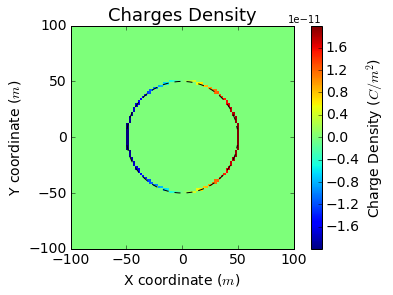

In [3]:
fig, ax = plt.subplots(1,1)
ax = Plot_ChargesDensity(XYZ,sig0,sig1,R,E0,ax)

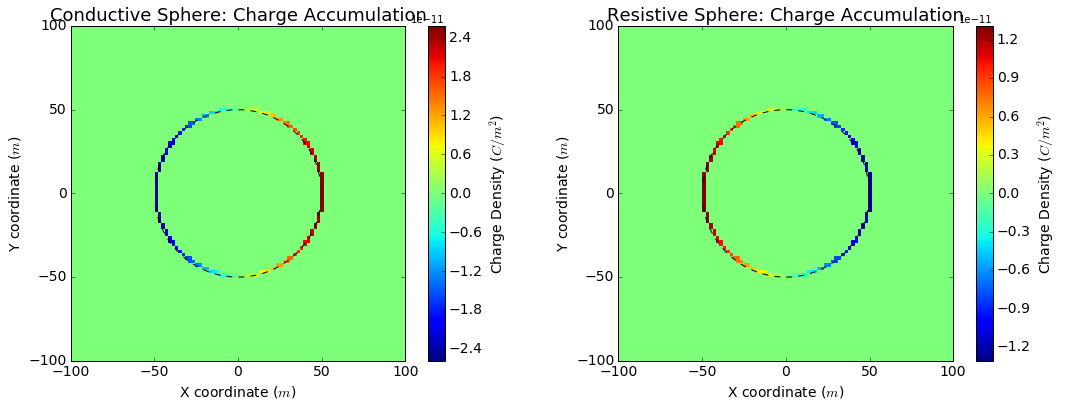

In [8]:
    sig0 = 10.**-3          # conductivity of the wholespace in S/m
    sig1 = 10.**-1         # conductivity of the sphere in S/m
    sig2 = 10.**-5         # conductivity of the sphere in S/m
    R    = 50.          # radius of the sphere in m
    E0   = 1.           # inducing field strength in V/m
    n = 100             #level of discretisation
    xr = np.linspace(-2.*R, 2.*R, n) # X-axis discretization
    yr = xr.copy()      # Y-axis discretization
    dx = xr[1]-xr[0]       # mesh spacing
    dy = yr[1]-yr[0]       # mesh spacing
    zr = np.r_[0]          # identical to saying `zr = np.array([0])`
    XYZ = ndgrid(xr,yr,zr) # Space Definition

    fig, ax = plt.subplots(1,2,figsize=(18,6))
    ax = mkvc(ax)
    ax[0] = Plot_ChargesDensity(XYZ,sig0,sig1,R,E0,ax[0])
    ax[0].set_title('Conductive Sphere: Charge Accumulation',fontsize=ftsize_title)
    ax[1] = Plot_ChargesDensity(XYZ,sig0,sig2,R,E0,ax[1])
    ax[1].set_title('Resistive Sphere: Charge Accumulation',fontsize=ftsize_title)

In [ ]:
example = 'Inversion' # ElectricFields, Currents, Charges, Differences

if example is 'Potentials':
    fig,ax = plot_Potentials(XYZ, R, sig0, sig1, E0)
elif example is 'ElectricFields':
    fig,ax = plot_ElectricField(XYZ,R, sig0, sig1 , E0, PlotOpt)
elif example is 'Currents':
    fig,ax = plot_Currents(XYZ,R, sig0, sig1,E0,PlotOpt)
elif example is 'Charges':
    fig,ax = plot_Charges(XYZ,R, sig0, sig1, E0)
elif example is 'Differences':
    fig = plot_PotentialDifferences(XYZ,R,sig0,sig1,E0,xstart,ystart,xend,yend,nb_dipole,electrode_spacing,PlotOpt)
elif example is 'Inversion':
    fig = inversion_uncertainty(XYZ,sig0,sig1,sig2,R0,R1,E0,xstart,ystart,xend,yend,nb_dipole,electrode_spacing,PlotOpt)

# Interactive

In [ ]:
R_slider  = FloatSlider(min=0., max =50., step=10.,value=50.)
S1_slider = FloatSlider(min=1., max =100., step=1.,value=100.)
S0_slider = FloatSlider(min=1., max =100., step=1.,value=10.)
E0_slider = FloatSlider(min=-10., max =10., step=1.,value=1.)

def plot_Potentials_interactive(R, sig1, sig0, E0):
    fig, ax = plot_Potentials(XYZ,R,sig1,sig0,E0)
    plt.show()
    return None

app = interactive(plot_Potentials_interactive, R=R_slider, sig1=S1_slider, sig0=S0_slider,E0=E0_slider)
app

In [ ]:
sig0 = 10.         
sig1 = 100.         
sig2 = 13.10344828
R0    = 10.          
R1 = 20.
E0   = 1.           
n = 100             
xr = np.linspace(-100, 100, n) 
yr = xr.copy()      
zr = np.r_[0]          
XYZ = ndgrid(xr,yr,zr)
xstart = -100.
ystart = 50.
xend = 100.
yend = 50.
nb_dipole = 11
electrode_spacing = 20.
PlotOpt = 'Total'
inversion_uncertainty(XYZ,sig0,sig1,sig2,R0,R1,E0,xstart,ystart,xend,yend,nb_dipole,electrode_spacing,PlotOpt)

In [ ]:
R = 0.5 
x = np.linspace(-R,R,500)
top = np.sqrt(R**2-x**2)
bot = -np.sqrt(R**2-x**2)
axlim = 3*R

fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(x, top, x, bot, color=[0.1,0.1,0.6],linewidth=1.5)
ax.fill_between(x,bot,top,color=[0.1,0.1,0.6],alpha=0.5 )
ax.set_xlim([-axlim,axlim])
ax.set_ylim([-axlim,axlim])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel('x',fontsize=12)
ax.set_ylabel('y',fontsize=12)
ax.arrow(0.,0.,np.sqrt(R)/2.,np.sqrt(R)/2.,head_width=0.05,head_length=0.0)
ax.text(np.sqrt(R)/4.-0.15,np.sqrt(R)/4.,'$R$',fontsize=13)
[ax.arrow(-axlim,_,R,0.,head_width=0.05,head_length=0.05,color='k') for _ in np.linspace(-2*R,2*R,num=5)]
ax.text(-axlim+0.05, 0.1, '$\mathbf{E_0} = E_0 \mathbf{\hat{x}}$', fontsize=14)
ax.patch.set_facecolor([0.4,0.7,0.4])
ax.patch.set_alpha(0.2)
ax.text(-0.05,-np.sqrt(R)/2.,'$\sigma_1$',fontsize=14)
ax.text(-0.05,-R-0.2,'$\sigma_0$',fontsize=14)  

sig0 = 10.          # conductivity of the wholespace
sig1 = 100.         # conductivity of the sphere
R    = 50.          # radius of the sphere
E0   = 1.           # inducing field strength
n = 100             #level of discretisation
xr = np.linspace(-2.*R, 2.*R, n) # X-axis discretization
yr = xr.copy()      # Y-axis discretization
dx = xr[1]-xr[0]       # mesh spacing
dy = yr[1]-yr[0]       # mesh spacing
zr = np.r_[0]          # identical to saying `zr = np.array([0])`
XYZ = ndgrid(xr,yr,zr) # Space Definition

fig1,ax1 = Plot_Primary_Potential(XYZ,sig0,sig1,R,E0)

#fig.axes.append(ax1)